Step 1. Importing required libraries.

In [1]:
#Importing all the required Packages
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
from pylab import rcParams
import warnings
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
warnings.filterwarnings("ignore")

Step 2. Loading ethereum dataset "eth.csv" into variable data and priniting a few rows to see how does data look like:

In [2]:
df = pd.read_csv("C:/Users/sivay/Downloads/eth.csv")

In [3]:
df.head()
df.columns

Index(['date', 'AdrActCnt', 'BlkCnt', 'BlkSizeByte', 'BlkSizeMeanByte',
       'CapMrktCurUSD', 'DiffMean', 'FeeMeanNtv', 'FeeMeanUSD', 'FeeMedNtv',
       'FeeMedUSD', 'FeeTotNtv', 'FeeTotUSD', 'HashRate', 'IssContNtv',
       'IssContPctAnn', 'IssContUSD', 'IssTotNtv', 'IssTotUSD', 'NVTAdj',
       'NVTAdj90', 'PriceBTC', 'PriceUSD', 'ROI1yr', 'ROI30d', 'SplyCur',
       'TxCnt', 'TxTfrCnt', 'TxTfrValAdjNtv', 'TxTfrValAdjUSD',
       'TxTfrValMeanNtv', 'TxTfrValMeanUSD', 'TxTfrValMedNtv',
       'TxTfrValMedUSD', 'TxTfrValNtv', 'TxTfrValUSD', 'VtyDayRet180d',
       'VtyDayRet30d', 'VtyDayRet60d'],
      dtype='object')

Step 3.1. Dropping all columns except "date" and "PriceUSD" based on which prediction can be done further. Changing the datatype of date to date and time 
Printing the data to see how it appears now.
.

In [4]:
df=df[['date','PriceUSD']]
df['date'] = pd.to_datetime(df['date'])

In [5]:
print(df.head())

        date  PriceUSD
0 2015-07-30       NaN
1 2015-07-31       NaN
2 2015-08-01       NaN
3 2015-08-02       NaN
4 2015-08-03       NaN


Step 3.2. Checking for null values and dropping them.

In [6]:
print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1742 entries, 0 to 1741
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1742 non-null   datetime64[ns]
 1   PriceUSD  1733 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 27.3 KB
None


date        0
PriceUSD    9
dtype: int64

Results shows 9 values are missing for "PriceUSD". Upon checking the actual data in CSV file, it appears that first 9 consecutive values for "PriceUSD" are missing so best way to deal with it is to directly remove or drop these rows instead of imputing those missing places with mean or mode values.

In [7]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

After dropping the respective rows, it seems that now there are no missing values. 

In [8]:
df.head()

,date,PriceUSD
0,2015-08-08,1.19999
1,2015-08-09,1.19999
2,2015-08-10,1.19999
3,2015-08-11,0.99000
4,2015-08-12,1.28800


Step 3.3. Grouping on date

In [9]:
#Grouping the based on date so as to obtain the data for all the same dates one after the other 
df= df.groupby('date')
df.head()

,date,PriceUSD
0,2015-08-08,1.199990
1,2015-08-09,1.199990
2,2015-08-10,1.199990
3,2015-08-11,0.990000
4,2015-08-12,1.288000
...,...,...
1728,2020-05-01,212.713618
1729,2020-05-02,214.133871
1730,2020-05-03,210.090575
1731,2020-05-04,206.961927


Step 3.4. Making column "date" as the index of data.

In [10]:
#Adding the values of same dates together and resetting the index for the resultant table
df=df['PriceUSD'].sum().reset_index()

In [11]:
#Since time series required to be indexed with respect to datastamp, setting date as the index for the DataFrame
df=df.set_index('date')

In [12]:
df.head()
df.index

DatetimeIndex(['2015-08-08', '2015-08-09', '2015-08-10', '2015-08-11',
               '2015-08-12', '2015-08-13', '2015-08-14', '2015-08-15',
               '2015-08-16', '2015-08-17',
               ...
               '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29',
               '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03',
               '2020-05-04', '2020-05-05'],
              dtype='datetime64[ns]', name='date', length=1733, freq=None)

In [13]:
#Resampling the sales date by taking the mean of all the sales for a particular month 
#and assigning the values to first date of the month
y = df['PriceUSD']


Step 4.1. In this step, the plot has been drawn to visually see the distribution of data over the years. Needless to say, 2018 has the huge spike in "PriceUSD" whereas less variation has observed from 2016 to 2017 and 2019 to 2020.

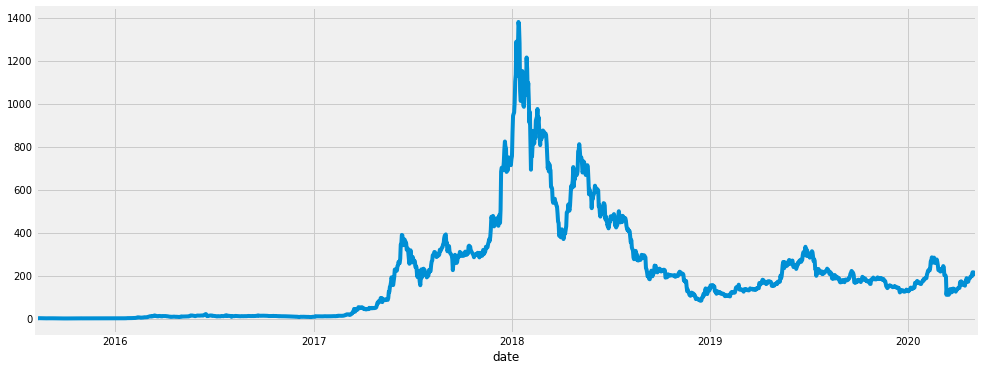

In [14]:
#Plotting the time series plot
y.plot(figsize=(15, 6))
plt.show()

Decomposing the above obtained time series into its subcomponents namely (Observed,Trend,Seasonal,Residual)

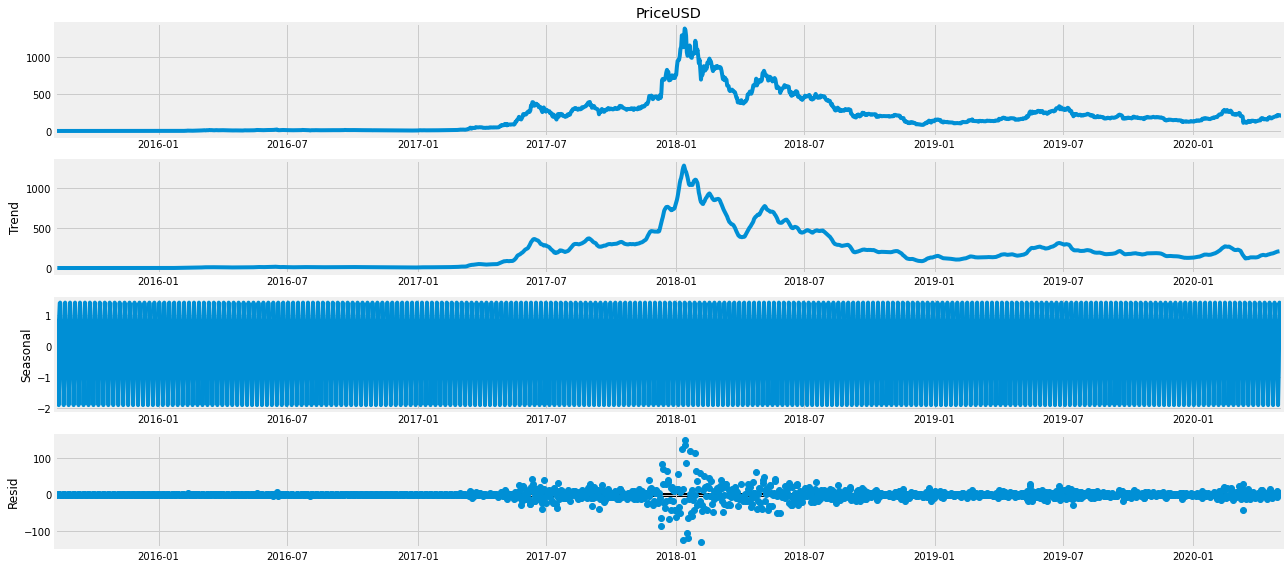

In [15]:
#Decomposing the above obtained time series into its subcomponents namely (Observed,Trend,Seasonal,Residual)
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()
#Observed - Plot shows the original time series plot
#Trend  - Plot shows how the data varies over period of time 
#Below Trend graph we can observe there is no fixed trend pattern
#Seasonal - Plot shows how the data varies seasonally
#Below Seasonal plot shows that there is increase of sales every year end and it falls back at the start of the year
#Residual - Plot shows any left over abnormalities after seperating Trend and Seasonal patterns from original data
#Below Residual plot shows there exists abnormalities but no defined pattern can be observed

Step 5. Check Seasonality and Trend for Stationarity.

        Plotting Original data along with rolling mean and rolling standard deviation would help to visually see if the series is stationary or not.

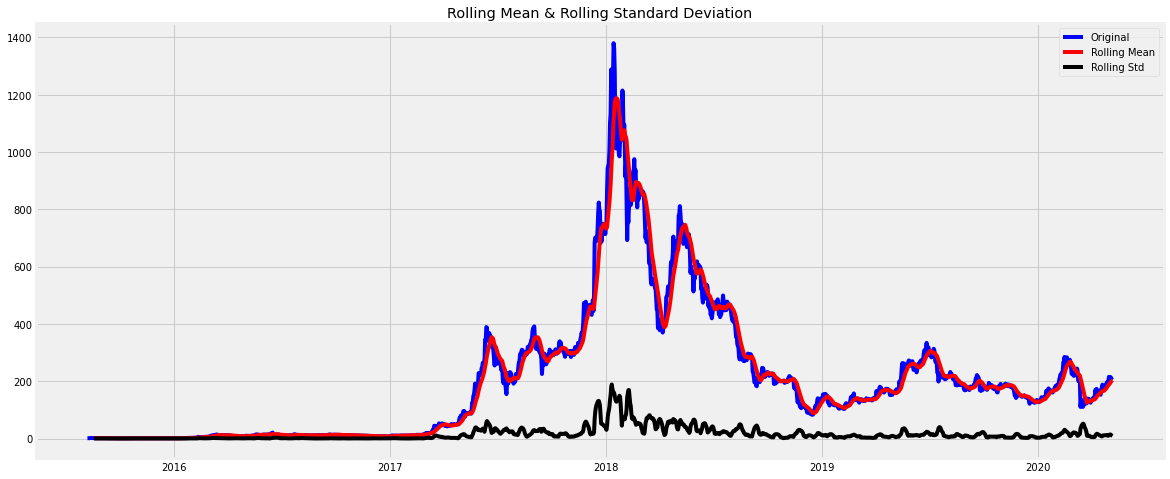

In [16]:
#Plotting Rolling mean and Rolling Standard deviation of our original series
rolling_mean= y.rolling(window=12).mean()
rolling_std= y.rolling(window=12).std()
plt.plot(y, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

Plot clearly shows that the series is not stationary because it

     1. Does not have constant mean and
     2. Does not have constant standard deviation
     
To re-check and get the p-value, let's perform Dickey-Fuller test along with plotting the seasonal decomposition of the data to see "Trend", "Residual" and "Seasonality" of the series. 

In [17]:
#Augmented Dickey–Fuller test
#Another approach for finding the differentiation term is Augmented Dickey–Fuller test.
#This test takes Null Hypothesis as the series to be not stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.343049
p-value: 0.158459


Dickey-Fuller test confirms that the series is not stationary because p=0.158459 which is more than 0.05. 

To make series stationary, let's perform the differencing of data followed by dropping null value as for first value in the table there is no value to have differencing with. This results in having NaN. Once this is done, let's perform Dickey-Fullet test again to see if p-value is significant.

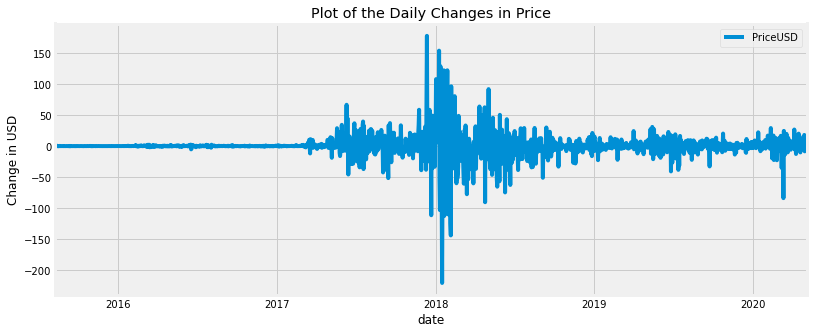

In [18]:
# Differencing the price
df_diff =df.diff(1).dropna()

# Plotting the differences daily
df_diff.plot(figsize=(12,5))
plt.title('Plot of the Daily Changes in Price')
plt.ylabel('Change in USD')
plt.show()

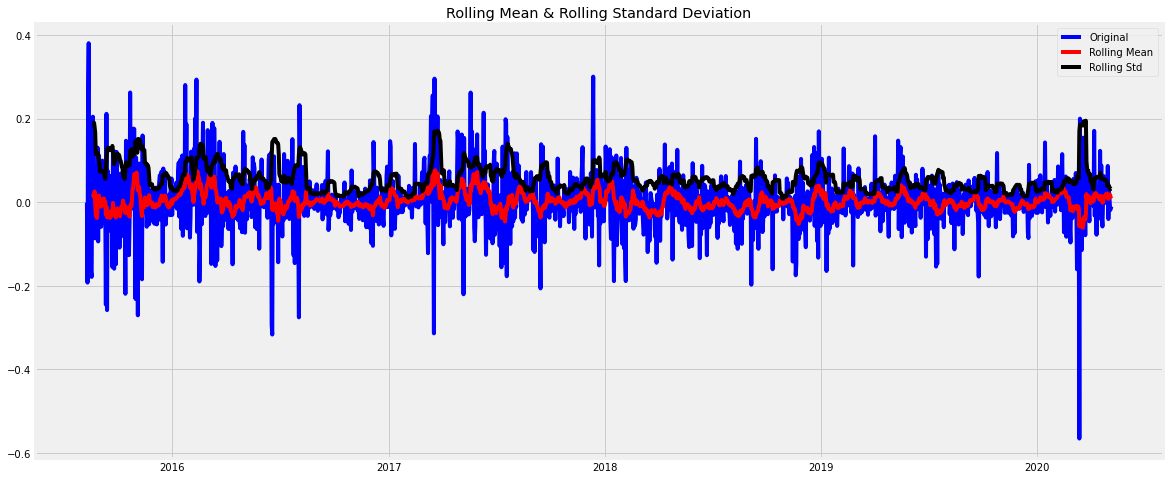

In [20]:
#Plotting Rolling mean and Rolling Standard deviation of our original series
rolling_mean=df_diff.rolling(window=12).mean()
rolling_std= df_diff.rolling(window=12).std()
plt.plot(df_diff, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

Here the rolling mean and varience are almost stationary.

Finding the p,q values using ACF and PACF

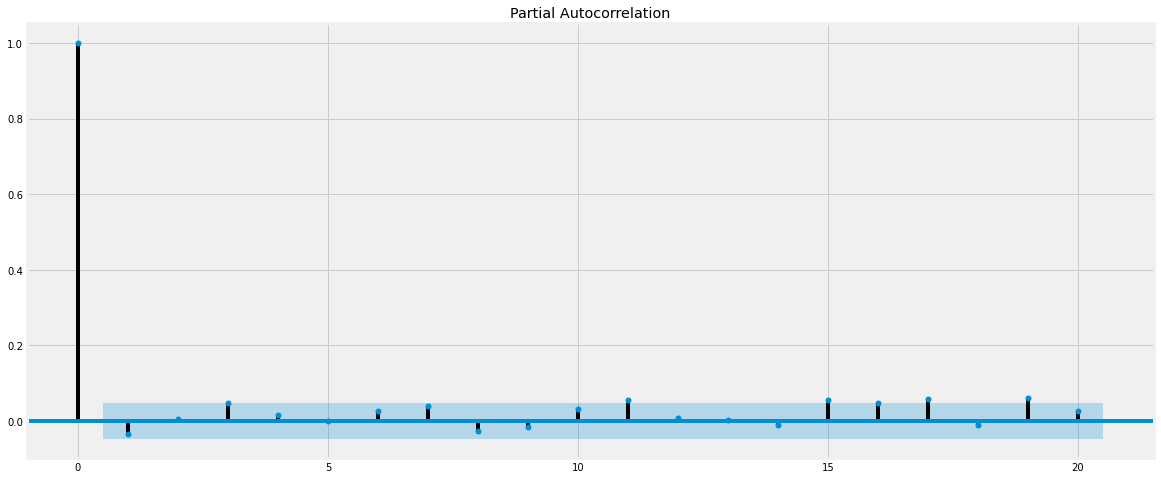

In [21]:

from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_pacf(df_diff.PriceUSD,lags=20)
plt.show()

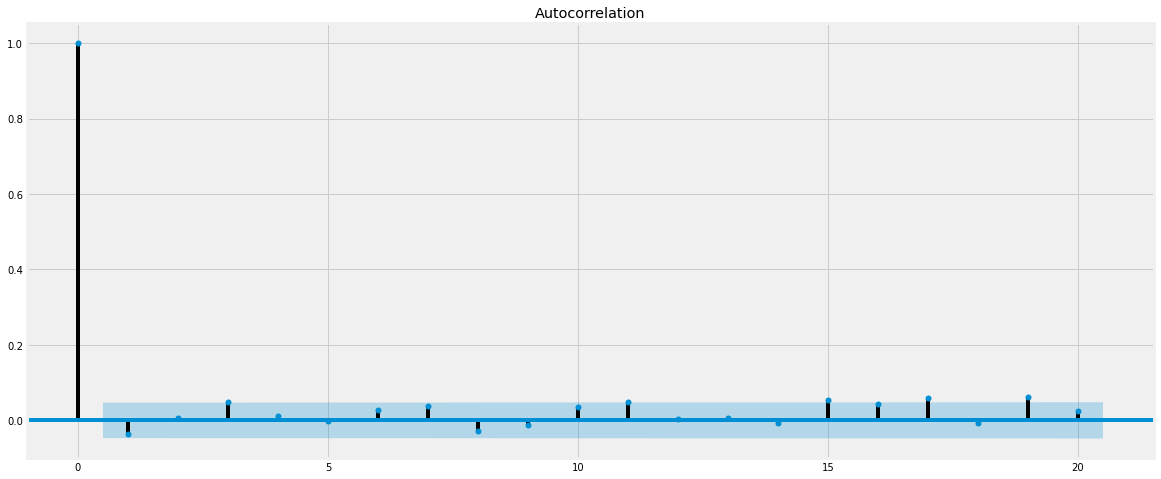

In [22]:
plot_acf(df_diff.PriceUSD,lags=20)
plt.show()

From this we can understand that value 0 or 1 can be chosen as the p,q values

Building the model with the pdq values with no seasonality

In [25]:
modelN = pm.auto_arima(y, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=1, max_q=1, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(modelN.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15169.704, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15168.013, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15167.784, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15167.768, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15164.700, Time=1.30 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=15162.762, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=15165.843, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=15166.071, Time=0.06 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 2.726 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1733
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -7578.381
Date:                Fri, 23 Oct 2020   AIC                          15162.762
Time:                       

Plotting the model

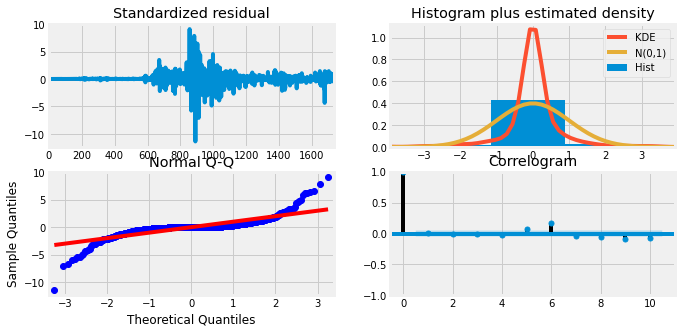

In [26]:
modelN.plot_diagnostics(figsize=(10,5))
plt.show()

Making predictions using the model

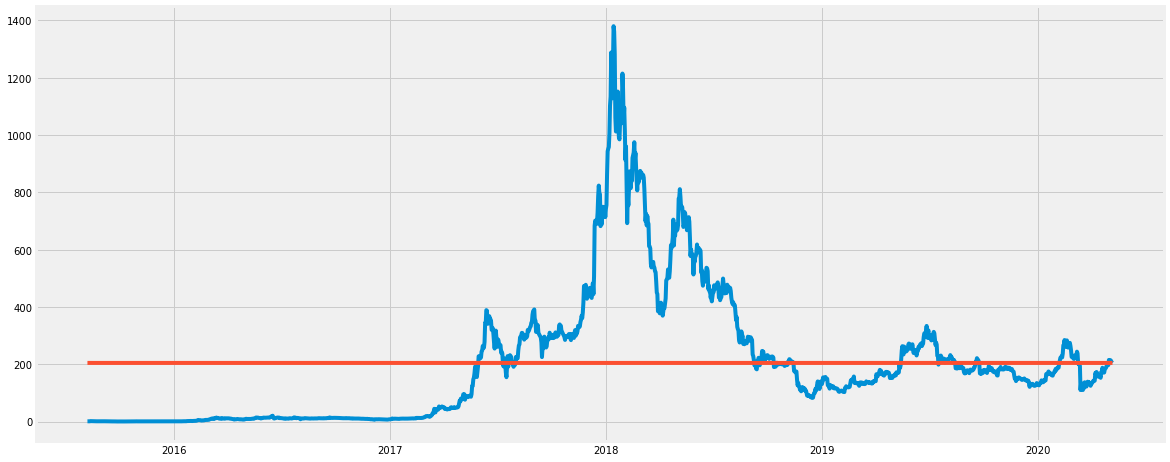

In [27]:
forecast=modelN.predict(n_periods=len(y))
forecast = pd.DataFrame(forecast,index = y.index,columns=['Prediction'])
forecast
plt.plot(y)
plt.plot(forecast)
plt.show()

ARIMA with seasonality

In [28]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
models =pm.auto_arima(y, start_p=1, start_q=0,
                     max_p=1, max_q=1, m=7,
                         start_P=0,max_P=1,start_Q=1, seasonal=True,
                         d=1,D=1,trace=True,
                         error_action='ignore',  
                         suppress_warnings=True,
                         stepwise=True)

print(models.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=inf, Time=3.75 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=16356.457, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=15787.187, Time=0.72 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=3.61 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=16358.436, Time=0.12 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=5.57 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=15787.763, Time=0.56 sec
 ARIMA(1,1,1)(1,1,0)[7]             : AIC=15789.048, Time=1.27 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=15787.124, Time=0.94 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=16358.434, Time=0.34 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=inf, Time=6.35 sec
 ARIMA(0,1,1)(1,1,0)[7] intercept   : AIC=15789.124, Time=2.64 sec

Best model:  ARIMA(0,1,1)(1,1,0)[7]          
Total fit time: 25.954 seconds
                                     SARIMAX Results                                      
Dep. Var

Making predicitons

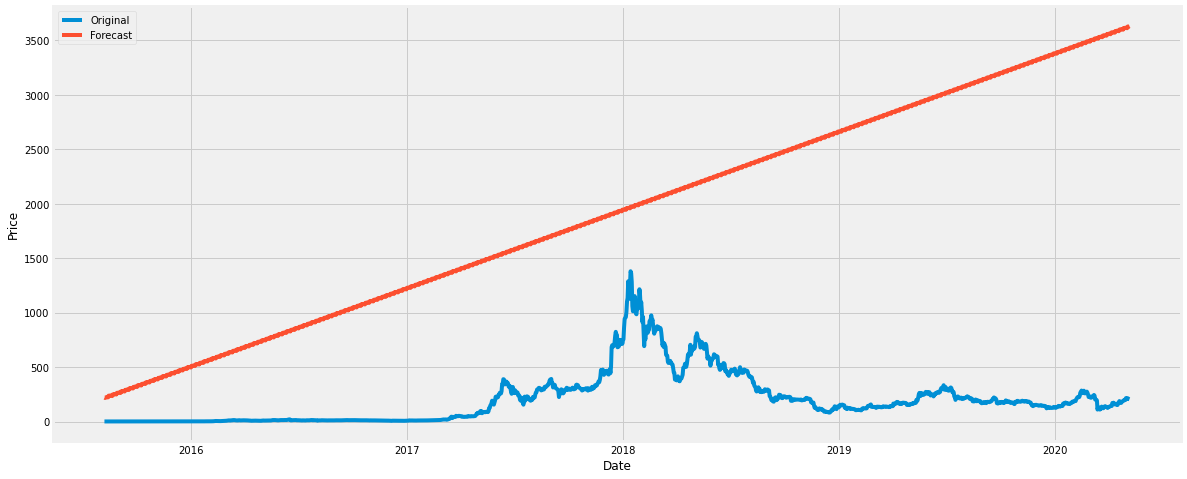

In [29]:
forecast=models.predict(n_periods=len(y))
forecast = pd.DataFrame(forecast,index = y.index,columns=['Prediction'])
forecast
plt.plot(y,label='Original')
plt.plot(forecast,label='Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [30]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

Finding the hyperparameters for SARIMAX model

In [31]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC:24764.476074344635
ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC:22681.14992063654
ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC:18638.891685998737
ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC:18572.242115891277
ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC:18639.142481159033
ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC:18631.315358658263
ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC:18582.048875376273
ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC:18574.199389990536
ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC:22478.796832284625
ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC:20833.654781242476
ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC:17303.89718779568
ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC:17210.50428964482
ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC:17308.31686202347
ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC:17264.44624544216
ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC:17225.617339290293
ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC:17208.588827856387
ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC:15160.0116986297
ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC:15106.426551097613
ARIMA(0, 1, 0)x(0, 1, 0, 7) - AIC:16347.976205448855


Building model using the best parameters

In [33]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 7),
                                enforce_stationarity=True,
                                simple_differencing=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                          PriceUSD   No. Observations:                 1733
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -7566.931
Date:                           Fri, 23 Oct 2020   AIC                          15141.863
Time:                                   10:45:34   BIC                          15163.674
Sample:                               08-08-2015   HQIC                         15149.931
                                    - 05-05-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8726      0.030    -29.013      0.000      -0.931      -0.814
ma.L1          0.9077      0.026     34.419

In [34]:
results

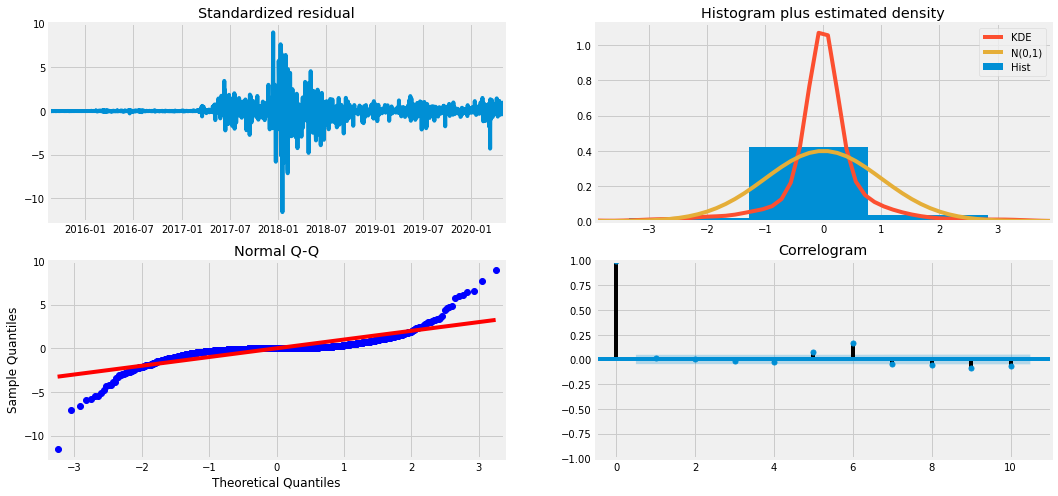

In [35]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Making predictions of the actual data

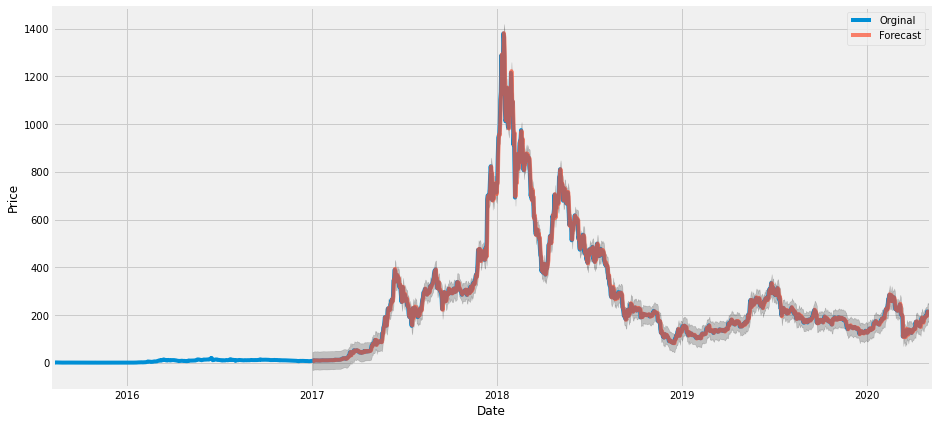

In [36]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='Orginal')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

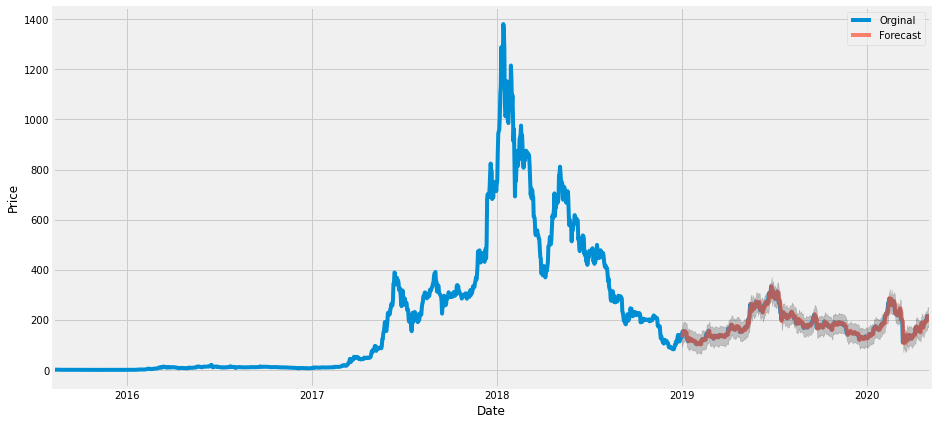

In [38]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='Orginal')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

Making future predictions

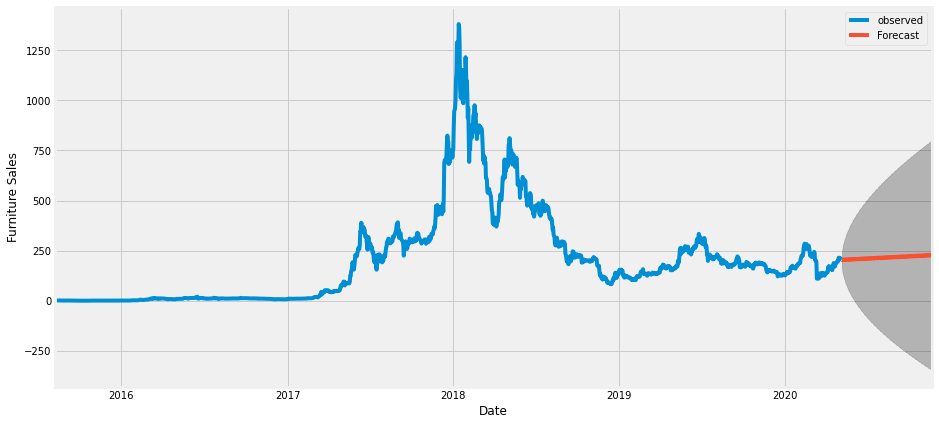

In [39]:
pred_uc = results.get_forecast(steps=200)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

Getting the values of future 7 days

In [40]:
from datetime import datetime, timedelta
df['Forecast2'] = results.predict(start=datetime(2018,12,31), end=datetime(2020,6,6))

In [41]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1]+ DateOffset(days=x) for x in range(0,7)]

In [42]:
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=df.columns)

In [43]:
future_df = pd.concat([df, future_dates_df])

In [44]:
future_df['Forecast'] = results.predict(start=datetime(2020,5,6), end=datetime(2020,5,13), dynamic = True)

In [45]:
future_df['Forecast'].tail(7)

2020-05-05           NaN
2020-05-06    203.650662
2020-05-07    202.425327
2020-05-08    203.754264
2020-05-09    205.990704
2020-05-10    205.650154
2020-05-11    205.049315
Name: Forecast, dtype: float64